Class: AI INSIGHT 

Name: Nguyen Tho Anh Khoa

Facebook: Khoa Nguyen KT

# CNN – Exercise 1

## 1) Các bạn đọc hiểu file “1.CNN.ipynb” về cách thức xây dùng các model CNN và thao tác với Conv2D layer trong keras.

Để có thể khai báo 1 Convolution 2D layer thì các tham số cơ bản cần điền vào

**- filter** số lượng kernel mong muốn cũng chính là số lượng channel của feature map 

**- kernel_size** width và height của kernel mong muốn (thông thường sẽ bằng nhau và số là lẻ vì khi quá trình conv 1 kernel vuông có cạnh là số lẻ pixel sẽ được tính toán và đưa vào center của kernel vd:(3,3), (5,5)...) 

**- strides** số lượng pixel mà kernel sẽ nhảy sang step tiếp theo.

**- padding** 'valid' có nghĩa là không padding, 'same' là tự động padding top/bottom/right/left để giữ nguyên width và height của input

**- input_shape** nếu là layer đầu tiên thì cần khai báo kích thước để , thay vì thêm 1 layer Input.

=> Ở đoạn code này sử dụng 1 filter có kích thước là 2x2 với input có shape là 3x3x1. Tổng số lượng parameter = $\pmb{filter*(width\_kernel*height\_kern*input\_channel** + 1)}$ = 1*(2*2*1 +1) = 5 parameters  

In [1]:
import tensorflow as tf
import tensorflow.keras as keras


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=1, kernel_size=(2, 2), input_shape=(3, 3, 1)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 1)           5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Ngoài ra kernel_size chỉ cần khai báo bằng 1 số thì 1 kernel vuông được tạo ra

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=1, kernel_size=2, input_shape=(3, 3, 1)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 1)           5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


số lượng parameter = 3*(2*2*2+1) = 27

In [2]:
import tensorflow as tf
import tensorflow.keras as keras


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(3, (2, 2), input_shape=(3, 3, 2)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 3)           27        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


Đoạn code bên dưới thể hiện cách sử dụng conv bằn cách đưa vào 1 input có shape (batch_size, w,h c). **batch_size** bắt buộc phải có không thể để (w,h,c)

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

# create a conv layer
a_conv_layer = keras.layers.Conv2D(filters=1, kernel_size=(2, 2))

# create input data
input_data = tf.random.uniform((1, 3, 3, 1), minval=0, maxval=1)

# call 'a_conv_layer' function
output_data = a_conv_layer(input_data)

print('input_data: \n', input_data.shape)
print('output_data: \n', output_data.shape)

input_data: 
 (1, 3, 3, 1)
output_data: 
 (1, 2, 2, 1)


## 2) Các bạn đọc hiểu file “2.FashionMNIST-CNN-onlyConv.ipynb” về cách áp dụng CNN cho bài toán phân loại dùng Fashion-MNIST data.

Load fashionMNIST data

In [4]:
import tensorflow as tf
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

print(train_images.shape)
print(test_images.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


Khởi tạo model, 

Input layer: nhận input có kích thước 28x28x1, 

Feature extrator: 4 CNN layers có số lượng kernel tăng dần từ 1-4 và cùng kernel_size 7x7, mỗi layer dùng relu activation

Classifier: là dense có 10 node tương ứng với 10 class (trước khi được đư vào, thì feature phải được flatten) dùng softmax 

In [5]:
# model
model = keras.models.Sequential()

# input is with the shape of (28, 28, 1)
model.add(tf.keras.Input(shape=(28, 28, 1)))

# Convolve with 1 (7x7) kernel 
# Output: (22x22x1)
model.add(keras.layers.Conv2D(1, (7, 7), activation='relu'))

# Convolve with 2 (7x7) kernel 
# Output: (16x16x2)
model.add(keras.layers.Conv2D(2, (7, 7), activation='relu'))

# Convolve with 3 (7x7) kernel 
# Output: (10x10x3)
model.add(keras.layers.Conv2D(3, (7, 7), activation='relu'))

# Convolve with 4 (7x7) kernel 
# Output: (4x4x4)
model.add(keras.layers.Conv2D(4, (7, 7), activation='relu'))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 1)         50        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 2)         100       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 3)         297       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 4)           592       
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 1,689
Trainable params: 1,689
Non-trainable params: 0
____________________________________________________

Sử dụng adam optimizer, SparseCategoricalCrossentropy(), metric là accuracy

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1316 - accuracy: 0.5859
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6593 - accuracy: 0.7624
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6124 - accuracy: 0.7785
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5964 - accuracy: 0.7887
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5697 - accuracy: 0.7989
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5630 - accuracy: 0.8016
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5556 - accuracy: 0.8029
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5504 - accuracy: 0.8061
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5452 - accuracy: 0.8098
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.542

In [ ]:
import tensorflow as tf
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

print(train_images.shape)
print(test_images.shape)


# model
model = keras.models.Sequential()

# input is with the shape of (28, 28, 1)
model.add(tf.keras.Input(shape=(28, 28, 1)))

# Convolve with 1 (7x7) kernel 
# Output: (22x22x32)
model.add(keras.layers.Conv2D(32, (7, 7), activation='relu'))

# Convolve with 2 (7x7) kernel 
# Output: (16x16x64)
model.add(keras.layers.Conv2D(64, (7, 7), activation='relu'))

# Convolve with 3 (7x7) kernel 
# Output: (10x10x128)
model.add(keras.layers.Conv2D(128, (7, 7), activation='relu'))

# Convolve with 4 (7x7) kernel 
# Output: (4x4x256)
model.add(keras.layers.Conv2D(256, (7, 7), activation='relu'))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        100416    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       401536    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)         1605888   
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense) 

## 3) (Optional) Dựa vào file “2.FashionMNIST-CNN-onlyConv.ipynb”, áp dụng CNN cho Cifar10 data

cifar10 có 50000 ảnh trong tập train với mỗi ảnh có shape 32x32x3 

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras

cifar10 = keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar10
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
#sample wise + local
rescale_x_train = (x_train/127.5) -1
rescale_x_test = (x_test/127.5) -1
prepro_x_train = np.asarray([img-np.mean(img, axis=(0,1))/np.std(img, axis=(0,1)) for img in rescale_x_train])
prepro_x_test = np.asarray([img-np.mean(img, axis=(0,1))/np.std(img, axis=(0,1)) for img in rescale_x_test])

In [ ]:
cifar10_model = keras.models.Sequential()
cifar10_model.add(keras.Input(shape=(32,32,3)))
#out: (26x26x16)
cifar10_model.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), activation='relu'))
#out: (20x20x32)
cifar10_model.add(keras.layers.Conv2D(filters=32, kernel_size=(7,7), activation='relu'))
#out: (14x14x64)
cifar10_model.add(keras.layers.Conv2D(filters=64, kernel_size=(7,7), activation='relu'))
#out: (8x8x128)
cifar10_model.add(keras.layers.Conv2D(filters=128, kernel_size=(7,7), activation='relu'))
cifar10_model.add(keras.layers.Flatten())
cifar10_model.add(keras.layers.Dense(units=256, activation='relu'))
cifar10_model.add(keras.layers.Dense(units=64, activation='relu'))
cifar10_model.add(keras.layers.Dense(units=10, activation='softmax'))
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        2368      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25120     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        100416    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         401536    
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [ ]:
cifar10_model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
cifar10_model.fit(prepro_x_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 15s 5ms/step - loss: 2.0060 - accuracy: 0.2319
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7021 - accuracy: 0.3737
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5656 - accuracy: 0.4294
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4540 - accuracy: 0.4730
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3690 - accuracy: 0.5092
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2884 - accuracy: 0.5372
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2067 - accuracy: 0.5712
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1275 - accuracy: 0.5975
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0330 - accuracy: 0.6314
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.00

In [ ]:
test_cifar10_loss, test_cifar10_acc = cifar10_model.evaluate(prepro_x_test, y_test, verbose=2)
print('Test accuracy:', test_cifar10_acc)

313/313 - 1s - loss: 3.2751 - accuracy: 0.4794
Test accuracy: 0.47940000891685486


In [ ]:
cifar10_model.predict_classes(prepro_x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 8, 8, ..., 5, 0, 7])

In [ ]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

## 4) (Optional) Các bạn tìm hiểu sơ qua các cách lấy feature trong computer vision như sobel, local binary patter; để thấy được ý nghĩa của các filter trong CNN

Sobel calculates not only the magnitude of the edges, but also their direction. The operator uses a 3x3 template horizontally then vertically:



The resulting image uses pythagoras to generate the magnitude of the edges and inverse tan to get the direction of the edges.



Trước khi nói về sobel thì cần phải làm rõ về edge detection 
Edge detection: là việc đánh dấu từng điểm thể hiện sự thay đổi đột ngột giá trị của pixel đó so với pixel xung quanh. Edge có thể là border giữa 2 vật thể màu trắng và đen. Edge detection thông thường sẽ tính toán đạo hàm để lấy được thông tin thay đổi về cường độ của các pixel. Cho ví dụ như hình bên dưới thì edge có thể detect được ở giữa ô thứ 4 và 5

![img1](https://lh3.googleusercontent.com/BkWFgBu8ZuHtZt_tUAJTJ0oCQzkOuL91UXs9XIj3b0ZTDDogn0J0_OFCtAgrnZ1RAtd89Gwl0xFGnMAmht5vqN0kZBj81XonvkoIjfXlVPUSrdERT5IWGO15h-KomKgBCgDfDJH4Oz59TXy2ey_85iTWkWfsqzWyRuLgHiatglhcIRtktQHlzvJrLSZauHQEIXjzvqWf9f2JWBvKtOlcQ3QZnPTGFvpQJvTjlIaBoPZorWdwj4tXgwLaxs5sdwZTfScaNP1M_ESDMn28oOG368ABjSu82TbiZssLOhTwFpduYUNJRUD0V1m_r7zGdqCAZYIHq4-V7Po1RQm4l2YPAuy_ZAUL1hwLesmBPZAv2iStp0EjzJQ9bZv-S31aWiut9MZdUyQe9PUKPPIlN26KAYb75Zdz92sv1CU96Z_lYxcw8QgGYic7g_sIFkKi040sRU-7RXhoU03Br0Zo0qCUipsmquJsvJZnNvvXcQe3fB3uxk_wiaWqpElqpOMC7nq0T6J_VvlKtaNSkOuT_b6LraYT-bJWUsK_TWYEVZ-q2YB6Xc5dofCeqhUGUOAT5IhJPA2hDGo7whB36iqTxIaSvE7Cw5UNslHTqb-C05X_AK6c6dHoIPWzeXTACR_RhKgyR2MANeLn2Qx7zcgxrpeR4UtWWrtXv0ZxENuYWBDQaE88WNU4Wr-n22aysSsiiw=w310-h65-no?authuser=0)  

Thông thường dựa trên đạo hàm bậc 1 của cường độ các element trong data để lấy được intensity gradient của data. Gọi I(x) là cường độ của pixel tại vị trí x, I'(x) là đạo hàm bậc 1 (intensity gradient) tại vị trí x, thì central difference operator có thể sự dụng như sau $I'(X) = -1*I(X-1) + 0*I(X) + 1*I(X+1)$. Sau đó có một threshold được định nghĩa từ trước nếu giá trị của intensity này lớn hơn threshold thì được xem là pixel thuộc edge.


**Sobel** là thuật toán đơn giản cho **edge detection** bằng cách sử dụng đạo hàm bậc 1 của cường độ thông tin. Thuật toán này thường được áp dụng cho low-level feature detection như detect đường thẳng dọc / ngang / chéo, ... Sobel detect những sự thay đổi trong các giá trị pixel thường là độ sáng (cường độ), bằng cách đạo hàm sự khác biệt giữa mỗi pixel (anchor pixel, thông thường là center pixel) và các pixel xung quanh nó (bản chất là xấp xỉ đạo hàm của 1 ảnh). Diện tích của các vùng có gradient cao nhất là nơi mà intensity thay đổi nhanh nhất trong vài pixel, có thể sẽ có edge ngay tại đó. Sau khi dùng sobel các low-level feture được extract ra và sẽ được sử dụng cho các ví dụ như phân loại ảnh, ...

INPUT: gray-scale image
OUPUT: intensity gradient map 

Sobel dùng 2 kernel (cos size là 3x3) để detect đạo hàm bậc 1 của sự thay đổi cường độ theo chiều ngang và chiều dọc.

$\pmb{G_x} = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 
\end{bmatrix} $ $\pmb{G_y} = \begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1 
\end{bmatrix}$ 

Và có thể combine thành 1 map 

$\pmb{G=\sqrt{G_x^2 + G_y^2}}$

Ngoài ra hướng của gradient cũng có thể tính được 

$\pmb{\Theta = arctan(\frac{G_y}{G_x})}$

**$\pmb{\Theta}$** = 0 là cạnh dọc, và khi tăng lên thì hướng của edges sẽ theo ngược chiều kim đồng hồ.


Việc tính toán output thường được gọi là convolution nhưng thực tế convolution phải flip ảnh input, nên theo toán học thì đây được xem như tính cross-correlation giữa các vùng diện tích có kích thước 3x3 của input và mask (Gx, Gy) cho mỗi pixel. Ouput cuối cùng sẽ là covariance giữa mask và input (nghĩa là với filter nhất định sẽ cho ra 1 covariance tương ứng của Input). 

In [ ]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
# img = io.imread('https://4.bp.blogspot.com/-OkMqq2kqdBg/Vp0w109VzHI/AAAAAAAABp0/yG2E49XkyiA/s1600/1.JPG')
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/3/3f/Bikesgray.jpg')
# img = io.imread("https://i.etsystatic.com/16109531/d/il/85d805/2221034313/il_340x270.2221034313_tb68.jpg?version=0")
Gx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Gx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Gy = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

def sobel_conv_img(img, kernel):
  rows, cols = img.shape[:2]
  
  if len(img.shape) == 3:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  
  # feature_map = np.zeros_like(img) # dtype=img.dtype) => cannot scale because force to 0-255
  feature_map = np.zeros((rows, cols), dtype=np.float64) 
  if len(kernel) == 1:
   for i in range(1, rows-1, 1):
    for j in range(1, cols-1, 1): 
      res_conv = np.sum(kernel[0]*img[i-1:i+2, j-1:j+2])
      feature_map[i, j] = res_conv
  else:
    for i in range(1, rows-1, 1):
      for j in range(1, cols-1, 1): 
        res_x = np.sum(kernel[0]*img[i-1:i+2, j-1:j+2])
        res_y = np.sum(kernel[1]*img[i-1:i+2, j-1:j+2])
        res_conv = np.sqrt(res_x**2 + res_y**2)
        feature_map[i, j] = res_conv

  # normalize result in range 0-255
  # feature_map = np.where(feature_map > 220, 255, 0)
  feature_map = feature_map-feature_map.min()
  feature_map = (feature_map/feature_map.max())*255

  return feature_map.astype(dtype=img.dtype)

x_gradient = sobel_conv_img(img, [Gx])
y_gradient = sobel_conv_img(img, [Gy])
comb_edges = sobel_conv_img(img, [Gx, Gy])



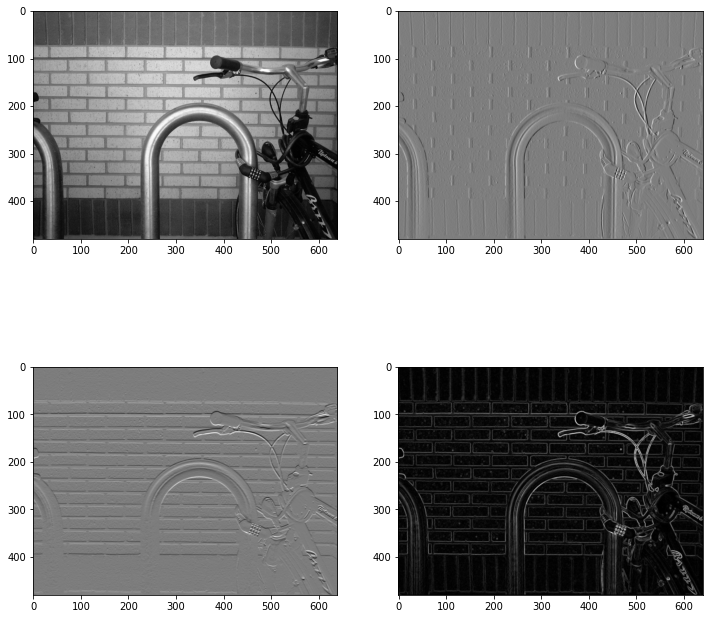

In [ ]:
fig = plt.figure(figsize=(12,12))
cols_fig = 2
rows_fig = 2
images = [img, x_gradient, y_gradient, comb_edges]
for i in range(1, cols_fig*rows_fig+1):
  fig.add_subplot(rows_fig,cols_fig, i)
  plt.imshow(images[i-1], cmap='gray')

plt.show()

### Local Binary Patterns





Local binary patters (LBP) dùng để trích xuất đặc trưng miêu tả kết cấu của một ảnh. LBP thực hiện trên các texture và pattern cục bộ của ảnh. Tưng tự như Sobel từng pixel trong ảnh sẽ được tính toán bằng 1 filter, và các pixel được tính toán gọi là center pixel dựa trên thông tin cẩu các pixel xung quanh nó.

INPUT: gray-scale image OUPUT: feature map

Bước đầu tiên 1 pixel sẽ được chọn, tếp theo số lượng và khỏang cách của các pixel neighbors của nó được lấy ra dựa trên 2 parmeter **p** số lượng các pixel neighbors, **r** bán kính từ center. Sau đó giá trị của center pixel được so sanh sánh với các neighboors được chọn, giá trị nào lớn hơn center pixel thì được label = 0, ngược lại sẽ được label = 1. Bước tiếp theo, xây dựng lại 1 chuỗi binary có thể theo hướng chiều kim đồng hồ hoặc ngược chiều kim đều được nhưng nó phải đồng nhất trong cách tính toán toàn pixel của input. Khi có được chuỗi binary, nó sẽ được convert sang số decimal và đó chính là giá trị mới. Các bước như vậy cứ được lặp lại cho đến khi toàn bộ pixel được tính tóan và sẽ thu được 1 feature map có size bằng với input. Bước cuối cùng là tính toán histogram trên feature map, vì số lượng bit trong 1 chuỗi binary = 2^p (thông thường p sẽ được chọn là 8 tức là sẽ có 1 filter 3x3), thì sẽ có range từ 0-2^p. Feature map sẽ được chia theo grid Gx*Gy, cứ mỗi subgrid thì có 1 histogram, khi combine Gx*Gy grid sẽ thu được 1 histogram lớn đại diện tính chất của ảnh input.

Ứng dụng của LBP là trích xuất đặc trưng để  của 1 input và so sánh nó với đặc trưng đã có sẵn.

- Convert sang binary 

![LBP1](https://www.pyimagesearch.com/wp-content/uploads/2015/12/lbp_thresholding.jpg)

- Tính theo chiều kim đồng hồ để lấy chuỗi binary và convert sang decimal
![LBP2](https://www.pyimagesearch.com/wp-content/uploads/2015/12/lbp_calculation-1024x299.jpg)

- Lấy giá mới nhất đưa vào output đúng vị trí như input 
![LBP3](https://www.pyimagesearch.com/wp-content/uploads/2015/12/lbp_to_output-1024x519.jpg)

Các cách cài đặt p và r khác nhau sẽ lấy được các neighbors khác nhau, nhưng nên thực hiệ theo khi r tăng thì p cũng tăng. Nếu r và p lớn thì sẽ lấy được nhiều chi tiết và thông tin hơn nhưng cũng sẽ làm cho nó mất tính cục bộ. Hơn nữa, sẽ có trường hợp các điểm chọn neighbors không nằm trong 1 pixel, lúc đó interpolation sẽ được tính toán để lấy giá trị đại diện cho điểm đó.
![LBP4](https://miro.medium.com/max/875/1*lcA9poRiT4KnWDaW-KfKjw.png)

Chia output thành Gx*Gy grid lấy histogram và combine thành 1 histogram lớn miêu tả đặc trưng của ảnh input

![LBP5](https://miro.medium.com/max/875/1*-cyqWPcas3CXp4O2O7xPpg.png)


**LBP uniformity** LBP được xem là uniform nếu nó có nhiều nhất 2 lần chuyển đổi từ 0-1 hoặc 1-0. (ví dụ 00001000  (2 transitions) và  10000000 (1 transition)). Khi có p neightbor thì sẽ có p+1 uniform patterns. Điều này giúp cho dù có xoay ảnh thì trích xuất đặc trưng vãn giống nhau.

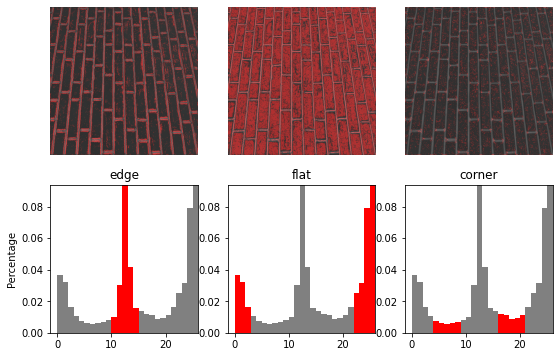

In [ ]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import matplotlib.pyplot as plt

METHOD = 'uniform'

# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


image = data.brick()
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

**=> Cả Sobel và LBP đều áp dụng kỹ thuật sử dụng filter (kernel) để trượt hết toàn bộ các pixel trong ảnh tạo ra một output được xem như là đăc trưng thể hiện cho ảnh input. Từ đó có thể hiểu được filter có kích thước nhất định và mỗi vị trí trong filter sẽ có 1 giá trị, khi filter thực hiện convolution (thực tế là cross-correlation) nó sẽ tính toán các giá trị pixel xung quanh của ảnh input để tạo ra giá trị mới cho output. Việc tính toán có thể khác nhau như Sobel sẽ là lấy tổng của các giá trị pixel nhân với vị trí tương ứng trong filter, con LBP thì biến đổi binary và convert sang decimal. Khi liên hệ với convlution layer trong deeplearning các filter trong đây sẽ được training (tìm các giá trị trong filter) để  có thể trích xuất được các đặc trưng cái mà giúp ích cho máy có thể thực hiện các task phía sau**


## 5) (Optional) Các bạn suy nghĩ ý nghĩa của việc dùng filter (1x1).

  Việc sử dụng filter 1x1 có 2 ý nghĩa chính:
  
  1. Giảm số chiều (Dimensionality reduction)  để giảm bớt số lượng parameters (được sử dụng trong Inception model của Google)

  2. Tạo ra fully-connected layer bằng convolutional layer để có thể nhận input với size khác nhau

In [ ]:
16*1*1*192*28*28 + 32*5*5*16*28*28

12443648

**1. Quản lý số lượng parameter và operations thông qua tăng giảm số chiều của filters: Ứng dụng là giảm số chiều (Dimensionality reduction)  để giảm bớt số lượng parameters và sự tính toán (được sử dụng trong Inception model của Google)**

Hình bên dưới thể hiện Inception module và ý nghĩa của 1x1 convolution là giảm số lượng tính toán

![inception_module](https://hackathonprojects.files.wordpress.com/2016/09/inception_implement.png?w=649&h=337)

Table này thể hiện số liệu tính toán các thông số tính toán của inception

![inception_param](https://hackathonprojects.files.wordpress.com/2016/09/googlenetarch.png?w=603&h=395)


Lấy ví dụ 5x5 convolution trong Inception module, nếu không sử dụng 1x1 convolution layer thì số lượng tính toán sẽ là 

từ table input là 28x28x192 và output của 5x5 convolution là 28x28x32, như vậy số lượng parameters = 32*(5*5*192 + 1)=153 632, và operations = 32*5*5*192*28*28 = 120 422 400 ~= 120M 

![5x5no1x1](https://hackathonprojects.files.wordpress.com/2016/09/noreduce.png?w=380&h=272)

Tiếp theo sử dụng 1x1 convolution ở bước trung gian để tạo ra 1 feature map có kích thước 28*28*16. Có nghĩa là giảm từ 192 filters xuống còn 16 filters trước khi output ra feature 28*28*32. Số lượng parameter = 16*(1*1*192 +1) + 32*(5*5*16 +1) = 15 920 và operations = 16*1*1*192*28*28 + 32*5*5*16*28*28 = 12 443 648 ~= 12M 

![5x5no1x1](https://hackathonprojects.files.wordpress.com/2016/09/reduced1.png)

**=> Khi sử dụng 1x1 conv số lượng parmeters và operation giảm đi gần 10 lần đôi với 5x5 conv trong trường hợp này, (150k -> 15k param, 120M -> 12M operations). Từ đó việc sử dụng 1x1 conv có thể điều khiển được việc tăng/gảm filter channel để quản lý số lượng parameter và operation mong muốn**

**2. Tạo ra fully-connected layer bằng convolutional layer để có thể nhận input với size khác nhau**

Sự khác biệt duy nhất giữ Fully-connected layer (FC) và Convlutional layer (CONV) là CONV layer được kết nối từ các vùng cục bộ của input, và các node trong CONV (neurons) sử dụng chung bộ paramater. Cả FC và CONV đều dùng dot prodcution nên các chức năng của neuron là hoạt động giống nhau, do đóc có thể xây dựng FC từ CONV

Cho bất kỳ CONV nào sẽ có 1 FC tương ứng hoạt động giông nhau trong forward step. Tuy nhiên weight matrix sẽ là 1 ma trận lớn chưa phần lớn là các số 0 vì CONV kết nối cục bộ và chia sẻ paramter.

Tương tự khi cho bất kỳ FC nào thì sẽ có 1 CONV tương ứng bằng cách cho size của filter bằng với size của input đầu vào, thì lúc này sẽ toàn neuron sẽ được kết nối với từng pixel input không còn kết nối cục bộ. ví dụ 1 ảnh đầu vào là 28*28*3 sử dụng FC có 1024 units sẽ tương đương với sử dụng CONV có size 28x28, stride=1, padding=0, số lượng filters = 1024 output sẽ là 1x1x1024 và kết quả này sẽ giống với kết  quả của FC vì tất cả pixel trong input sẽ có 1 giá trị weight tương ứng (tương đương tất các đều kết nối vào layer).

Áp dụng 1x1 conv: ví dụ khi ở phần header (có chức phân loại ảnh) thì input nhận vào sau khi qua convlution layers để trích xuất đặc trưng ảnh thì feature map là 7x7x512 và cần đi qua các FC layers để phân loại trong 1000 class. Lần lượt cac FC là FC_1 = 4096 units, FC_2 = 4096 units và FC_3=1000 units.
 
- FC_1 sẽ được thay thế bằng 7x7 conv  với 4096 channel, padding=0, stride=0 sẽ thu được output 1x1x4096 **(ở đây đã bao gồm flatten và fc_1, ngoài ra có thể  flatten bằng cách sử dụng 7x7 conv với số channel = 7x7x512 thu được 1x1x(7x7x512) rồi dung 1x1 conv 4096 filters để thu được 1x1x4096)**

- FC_2 sẽ được thay thế bằng 1x1 conv  với 4096 filters thu được 1x1x4096

- FC_3 sẽ được thay thế bằng  1x1 conv  với 1000 filters thu được 1x1x1000

## References

4a/

https://www.cs.toronto.edu/~mangas/teaching/320/slides/CSC320L05.pdf

https://www.southampton.ac.uk/~msn/book/new_demo/sobel/

https://ductri.github.io/posts/gradient-what-the-fuck-is-this/

https://computervision.fandom.com/wiki/Sobel


https://towardsdatascience.com/magic-of-the-sobel-operator-bbbcb15af20d

https://minhng.info/tutorials/xu-ly-anh-opencv-gradient-la-gi.html

https://towardsdatascience.com/the-power-of-local-binary-patterns-3134178af1c7

4b/

https://liris.cnrs.fr/Documents/Liris-5004.pdf

https://towardsdatascience.com/face-recognition-how-lbph-works-90ec258c3d6b#:~:text=Local%20Binary%20Pattern%20(LBP)%20is,powerful%20feature%20for%20texture%20classification.

https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

https://codelungtung.wordpress.com/2018/08/03/image-descriptor-local-binary-patterns/

https://towardsdatascience.com/the-power-of-local-binary-patterns-3134178af1c7

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html

5/

http://arxiv.org/abs/1409.4842

https://hacktildawn.com/2016/09/25/inception-modules-explained-and-implemented/

https://stats.stackexchange.com/questions/194142/what-does-1x1-convolution-mean-in-a-neural-network

https://cs231n.github.io/convolutional-networks/

http://cs231n.stanford.edu/slides/2020/lecture_5.pdf